In [9]:
#Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline

In [18]:
pd.set_option("display.max_rows",None)

In [119]:
#Import dataset
df = pd.read_csv("D:\Trung\Personal project\movies.csv")

In [20]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [22]:
df.shape

(7668, 15)

In [24]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [43]:
#Let calculate if there is any missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
budget     2171  0.283125
gross       189  0.024648
rating       77  0.010042
company      17  0.002217
runtime       4  0.000522
score         3  0.000391
votes         3  0.000391
writer        3  0.000391
country       3  0.000391
released      2  0.000261
star          1  0.000130
name          0  0.000000
genre         0  0.000000
year          0  0.000000
director      0  0.000000

In [74]:
null_data = df[df["budget"].isna()]
null_data

name     rating      genre  \
16                                                 Fame          R      Drama   
19                                           Stir Crazy          R     Comedy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
34                                 Seems Like Old Times         PG     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
54                                        City of Women          R     Comedy   
55                                     The Private Eyes         PG     Comedy   
60                                  Herbie Goes Bananas          G  Adventure   
61                                      The Competition         PG      Drama   
62                                         It's My Turn          R     Comedy   
63                                     Honeysuckle Rose         PG      Drama   
64                                         Resurrection         PG      Drama   
65                                                Fatso         PG     Comedy   
67                   The Fiendish Plot of Dr. Fu Manchu         PG     Comedy   
68                                               Serial          R     Comedy   
69                                        Hero at Large         PG     Comedy   
70                                        Wholly Moses!         PG     Comedy   
71    Bon Voyage, Charlie Brown (and Don't Come Back!!)          G  Animation   
72    In God We Trust (or Gimme That Prime Time Reli...         PG     Comedy   
73                                               Roadie         PG     Comedy   
74                           Just Tell Me What You Want          R     Comedy   
76                                   Little Miss Marker         PG     Comedy   
78                                              Babylon        NaN      Drama   
81                                              Windows          R      Drama   
82                                       Loving Couples         PG     Comedy   
83                         The King and the Mockingbird  Not Rated  Animation   
84                                     Oh, God! Book II         PG     Comedy   
85                               Those Lips, Those Eyes          R     Comedy   
86                                La Cage aux Folles II          R     Comedy   
87                                  The Gong Show Movie          R     Comedy   
88                                           Gilda Live          R     Comedy   
89                                     Why Would I Lie?         PG     Comedy   
90                                         First Family          R     Comedy   
91                                  Mantis Fist Fighter        NaN     Action   
93                                            Body Heat          R      Crime   
102                                            Das Boot        NaN  Adventure   
104                                          Possession          R      Drama   
107                                        Endless Love          R      Drama   
1

In [80]:
#cause budget is one of the important variable we are trying to find correlation, let's delete those empty rows
df.dropna(subset = ["budget","gross"],axis = 0,inplace = True)

In [81]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [82]:
#double check to make sure we have deleted them
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
rating       12  0.002208
company       2  0.000368
country       1  0.000184
runtime       1  0.000184
name          0  0.000000
genre         0  0.000000
year          0  0.000000
released      0  0.000000
score         0  0.000000
votes         0  0.000000
director      0  0.000000
writer        0  0.000000
star          0  0.000000
budget        0  0.000000
gross         0  0.000000

In [85]:
df.shape

(5436, 15)

In [84]:
df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [100]:
sns.set(rc = {'figure.figsize':(15,8)})

In [120]:
correlation_matrix = df.corr()
correlation_matrix

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

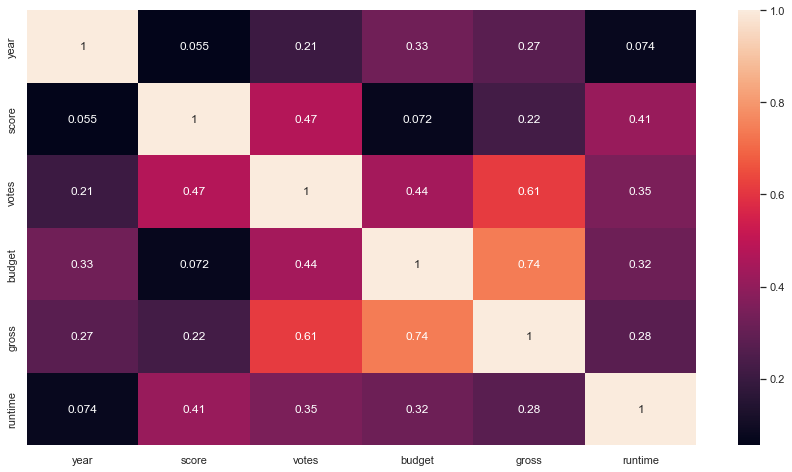

In [101]:
sns.heatmap(correlation_matrix, annot = True)
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

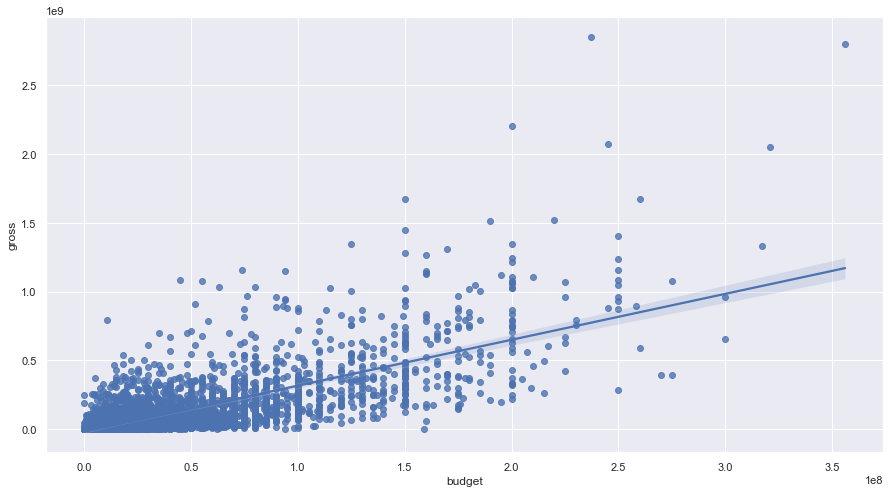

In [102]:
sns.regplot(x = df["budget"],y = df["gross"],data = df)

<AxesSubplot:xlabel='votes', ylabel='gross'>

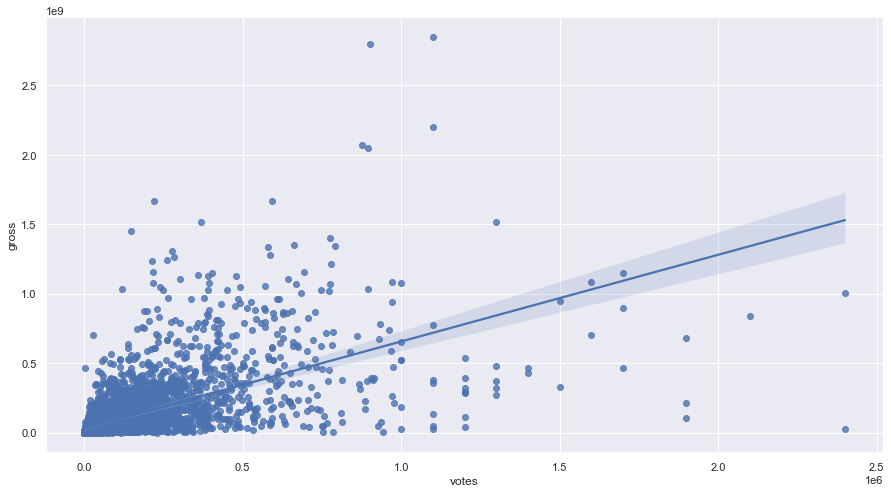

In [103]:
sns.regplot(x = df["votes"],y = df["gross"],data = df)

In [104]:
#We can see that there is a significant correlation between budget, votes with gross revenue, means the more budget, votes, 
#the higher gross revenue

In [124]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [105]:
#Now let's check the correlation between gross and categorical columns


In [138]:
a = df[df.columns]
for column in a.columns:
    if (a[column].dtype == "object"):
        a[column] = a[column].astype("category")
        a[column] = a[column].cat.codes
    
a.head()
        

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  
0  1047       54  19000000.0   46998772.0     2319    146.0  
1   327       55   4500000.0   58853106.0      731    104.0  
2  1745       55  18000000.0  538375067.0     1540    124.0  
3  2246       55   3500000.0   83453539.0     1812     88.0  
4   410       55   6000000.0   39846344.0     1777     98.0

In [126]:
matrix = a.corr()
matrix

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross     0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released  0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget    0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross     0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   

             gross   company   runtime  
name      0.005533  0.009211  0.010392  
rating   -0.107339 -0.032943  0.062145  
genre    -0.235650 -0.071067 -0.052711  
year      0.257486 -0.010431  0.120811  
released  0.001659 -0.010474  0.000868  
score     0.186258  0.001030  0.399451  
votes     0.630757  0.133204  0.309212  
director -0.014441  0.004404  0.017624  
writer   -0.023519  0.005646 -0.003511  
star     -0.002717  0.012442  0.010174  
country   0.092129  0.095548 -0.078412  
budget    0.740395  0.173214  0.320447  
gross     1.000000  0.154840  0.245216  
company   0.154840  1.000000  0.034402  
runtime   0.245216  0.034402  1.000000

<AxesSubplot:>

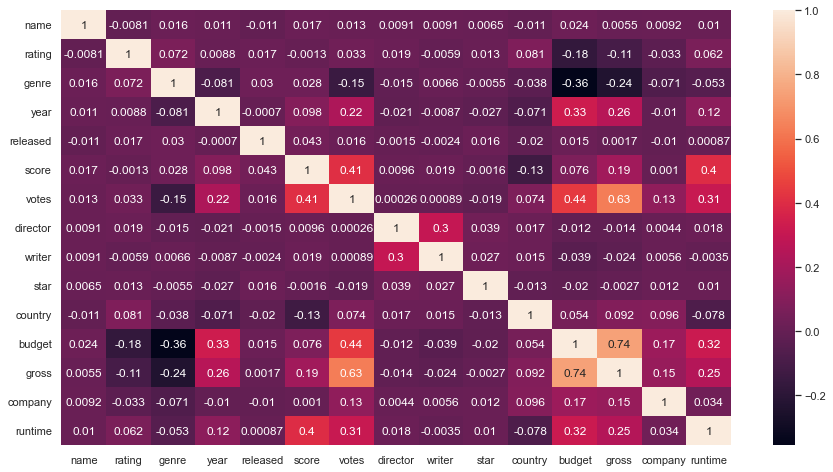

In [127]:
sns.heatmap(matrix,annot = True)

In [136]:
for i,row in matrix.iterrows():
    if i == "gross":
        print(row.sort_values(ascending = False))

gross       1.000000
budget      0.740395
votes       0.630757
year        0.257486
runtime     0.245216
score       0.186258
company     0.154840
country     0.092129
name        0.005533
released    0.001659
star       -0.002717
director   -0.014441
writer     -0.023519
rating     -0.107339
genre      -0.235650
Name: gross, dtype: float64


So we can conclude that budget and votes are most correlated with gross revenue.
Besides those, there are not variables have significant correlation with revenue

In [150]:
#Let's explore our data a little more


In [151]:
#Gross distribution
df.sort_values("gross",ascending = False).head(15)

name rating      genre  year  \
5445                                        Avatar  PG-13     Action  2009   
7445                             Avengers: Endgame  PG-13     Action  2019   
3045                                       Titanic  PG-13      Drama  1997   
6663    Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                        Avengers: Infinity War  PG-13     Action  2018   
7480                                 The Lion King     PG  Animation  2019   
6653                                Jurassic World  PG-13     Action  2015   
6043                                  The Avengers  PG-13     Action  2012   
6646                                     Furious 7  PG-13     Action  2015   
7494                                     Frozen II     PG  Animation  2019   
6644                       Avengers: Age of Ultron  PG-13     Action  2015   
7247                                 Black Panther  PG-13     Action  2018   
5845  Harry Potter and the Deathly Hallows: Part 2  PG-13  Adventure  2011   
7075       Star Wars: Episode VIII - The Last Jedi  PG-13     Action  2017   
7271                Jurassic World: Fallen Kingdom  PG-13     Action  2018   

                               released  score      votes         director  \
5445  December 18, 2009 (United States)    7.8  1100000.0    James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0    Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0    James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0      Joss Whedon   
6646      April 3, 2015 (United States)    7.1   370000.0        James Wan   
7494  November 22, 2019 (United States)    6.8   148000.0       Chris Buck   
6644        May 1, 2015 (United States)    7.3   777000.0      Joss Whedon   
7247  February 16, 2018 (United States)    7.3   661000.0     Ryan Coogler   
5845      July 15, 2011 (United States)    8.1   790000.0      David Yates   
7075  December 15, 2017 (United States)    7.0   581000.0     Rian Johnson   
7271      June 22, 2018 (United States)    6.2   277000.0      J.A. Bayona   

                  writer               star         country       budget  \
5445       James Cameron    Sam Worthington   United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio   United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000.0   
7480      Jeff Nathanson      Donald Glover   United States  260000000.0   
6653          Rick Jaffa        Chris Pratt   United States  150000000.0   
6043         Joss Whedon  Robert Downey Jr.   United States  220000000.0   
6646        Chris Morgan         Vin Diesel   United States  190000000.0   
7494        Jennifer Lee       Kristen Bell   United States  150000000.0   
6644         Joss Whedon  Robert Downey Jr.   United States  250000000.0   
7247        Ryan Coogler   Chadwick Boseman   United States  200000000.0   
5845        Steve Kloves   Daniel Radcliffe  United Kingdom  125000000.0   
7075        Rian Johnson       Daisy Ridley   United States  317000000.0   
7271      Derek Connolly        Chris Pratt   United States  170000000.0   

             gross                        company  runtime  
5445  2.847246e+09          Twentieth Century Fox    162.0  
7445  2.797501e+09                 Marvel Studios    181.0  
3045  2.201647e+09          Twentieth Century Fox    194.0  
6663  2.069522e+09                      Lucasfilm    138.0  
7244  2.048360e+09        

In [171]:
df_genre = df.groupby("genre").sum()
df_genre

year    score        votes        budget         gross   runtime
genre                                                                         
Action     3413334  10569.6  239541188.0  8.288672e+10  2.434359e+11  187800.0
Adventure   853807   2686.5   43358242.0  1.503806e+10  4.591660e+10   46107.0
Animation   677727   2288.0   43153458.0  2.114407e+10  8.014205e+10   31165.0
Biography   887710   3114.7   40057318.0  7.973380e+09  2.072958e+10   53107.0
Comedy     4486459  13905.5  121865748.0  3.413778e+10  9.717547e+10  227849.0
Crime      1101928   3676.0   50102551.0  9.057244e+09  2.135545e+10   61464.0
Drama      3036599  10147.6  105822171.0  2.016486e+10  5.715065e+10  171270.0
Family       21939     70.0     753550.0  2.045000e+08  2.157897e+09    1099.0
Fantasy      87826    264.3    2587900.0  7.092000e+08  1.664501e+09    4372.0
History       1983      8.3         79.0  3.235620e+05  0.000000e+00      55.0
Horror      644010   1851.7   21923322.0  3.385842e+09  1.454333e+10   31010.0
Music         1981      7.2      12000.0  0.000000e+00  1.100140e+05     117.0
Musical       4038     16.1        962.0  0.000000e+00  5.190692e+06     290.0
Mystery      39982    133.3    4602515.0  5.419000e+08  2.023671e+09    2315.0
Romance      19961     64.1     359974.0  1.202000e+08  1.883950e+08    1066.0
Sci-Fi       19948     62.1     884930.0  1.578700e+08  2.604899e+08    1003.0
Sport         2019      5.9        691.0  0.000000e+00  1.067629e+06      94.0
Thriller     31902     94.6     318891.0  9.460000e+07  3.232231e+08    1578.0
Western       5956     17.0       6199.0  2.100000e+07  3.202589e+07     292.0

<AxesSubplot:xlabel='genre'>

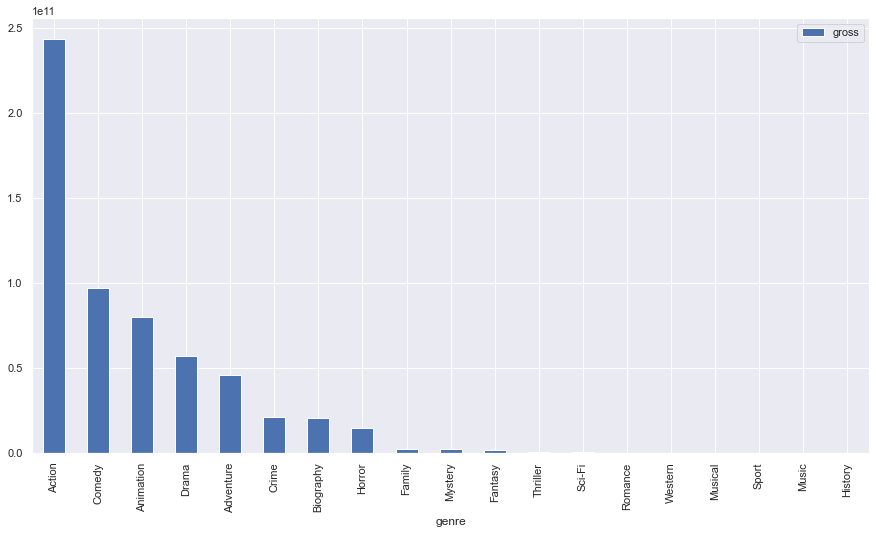

In [184]:
df_genre.sort_values("gross",ascending = False).plot(kind = "bar",y = "gross")

In [202]:
df_company = df.groupby("company").sum().sort_values("gross",ascending = False).head(15)
df_company

year   score       votes        budget  \
company                                                               
Warner Bros.               668240  2149.2  64133043.0  1.956830e+10   
Universal Pictures         753986  2410.9  51082093.0  1.598973e+10   
Columbia Pictures          664096  2100.1  41116704.0  1.551211e+10   
Paramount Pictures         639424  2027.5  42389829.0  1.372345e+10   
Twentieth Century Fox      480111  1499.9  36701007.0  1.147460e+10   
Walt Disney Pictures       246463   796.6  20200500.0  1.040470e+10   
New Line Cinema            348368  1076.8  22491700.0  5.648200e+09   
Marvel Studios              24189    91.2   9286000.0  2.664000e+09   
DreamWorks Animation        56281   193.1   5549000.0  3.344000e+09   
Touchstone Pictures        263597   841.8  12297900.0  4.153700e+09   
Dreamworks Pictures        152429   508.5  15450200.0  3.961700e+09   
Metro-Goldwyn-Mayer (MGM)  249648   767.8   8107546.0  3.548250e+09   
Summit Entertainment       120767   380.3  10717000.0  2.655269e+09   
Pixar Animation Studios     24102    91.1   5935000.0  1.756000e+09   
Fox 2000 Pictures          126457   401.7   7828800.0  2.329500e+09   

                                  gross  runtime  
company                                           
Warner Bros.               5.649142e+10  38081.0  
Universal Pictures         5.251419e+10  41406.0  
Columbia Pictures          4.300894e+10  36519.0  
Paramount Pictures         4.049361e+10  34299.0  
Twentieth Century Fox      4.025705e+10  25935.0  
Walt Disney Pictures       3.632789e+10  12846.0  
New Line Cinema            1.988380e+10  18494.0  
Marvel Studios             1.506559e+10   1627.0  
DreamWorks Animation       1.187361e+10   2603.0  
Touchstone Pictures        1.179583e+10  14446.0  
Dreamworks Pictures        1.163544e+10   8727.0  
Metro-Goldwyn-Mayer (MGM)  9.230230e+09  13162.0  
Summit Entertainment       8.373719e+09   6640.0  
Pixar Animation Studios    7.886345e+09   1194.0  
Fox 2000 Pictures          7.443503e+09   6987.0

<AxesSubplot:xlabel='company'>

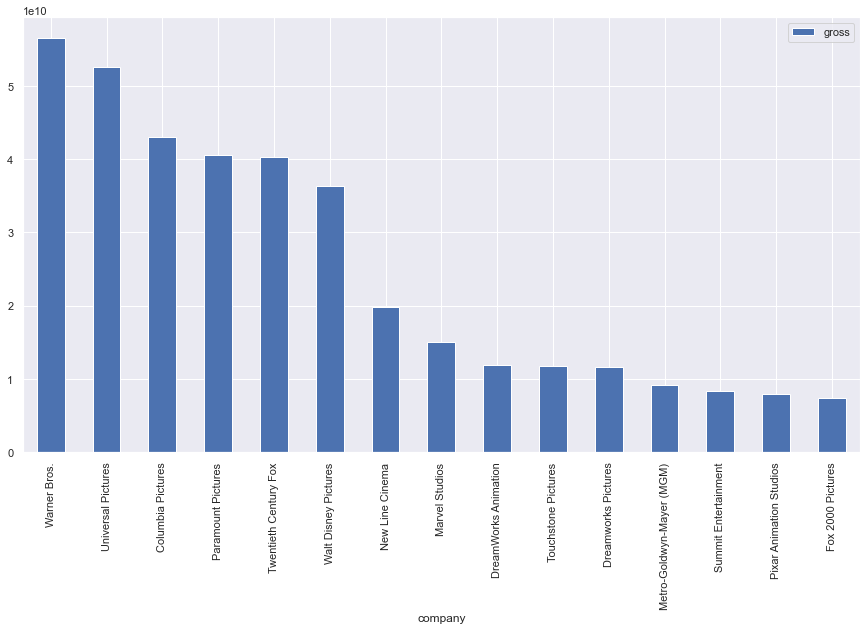

In [203]:
df_company.sort_values("gross",ascending = False).plot(kind = "bar",y = "gross")

In [197]:
df_star = df.groupby("star").sum().sort_values("gross",ascending = False).head(15)
df_star

year  score       votes        budget         gross  \
star                                                                      
Robert Downey Jr.  42142  147.1   8311100.0  2.298000e+09  1.185953e+10   
Tom Hanks          81977  286.8  12438800.0  2.292000e+09  9.952424e+09   
Tom Cruise         68033  232.9   8554200.0  2.602300e+09  9.602553e+09   
Daniel Radcliffe   26115   93.7   5117000.0  1.123000e+09  7.954065e+09   
Will Smith         46159  154.3   6332000.0  2.290100e+09  7.947279e+09   
Johnny Depp        66109  228.8   8371000.0  2.698500e+09  7.444239e+09   
Leonardo DiCaprio  40108  150.0  12027000.0  1.571500e+09  6.963368e+09   
Vin Diesel         30139   95.9   2955000.0  1.411000e+09  6.036313e+09   
Dwayne Johnson     44264  135.0   2743000.0  1.612000e+09  5.711271e+09   
Bruce Willis       68015  221.5   6984500.0  2.042300e+09  5.318951e+09   
Chris Pratt        12097   43.1   2955000.0  8.490000e+08  5.278456e+09   
Ben Stiller        54172  166.5   3733700.0  1.633000e+09  5.257347e+09   
Adam Sandler       56181  172.2   4227000.0  1.722700e+09  4.949567e+09   
Harrison Ford      51919  176.9   5357000.0  1.668000e+09  4.897078e+09   
Daisy Ridley        8069   27.9   1859500.0  8.490000e+08  4.480695e+09   

                   runtime  
star                        
Robert Downey Jr.   2547.0  
Tom Hanks           4804.0  
Tom Cruise          4240.0  
Daniel Radcliffe    1706.0  
Will Smith          2723.0  
Johnny Depp         3878.0  
Leonardo DiCaprio   2860.0  
Vin Diesel          1740.0  
Dwayne Johnson      2403.0  
Bruce Willis        3797.0  
Chris Pratt          716.0  
Ben Stiller         2748.0  
Adam Sandler        2891.0  
Harrison Ford       3148.0  
Daisy Ridley         537.0

<AxesSubplot:xlabel='star'>

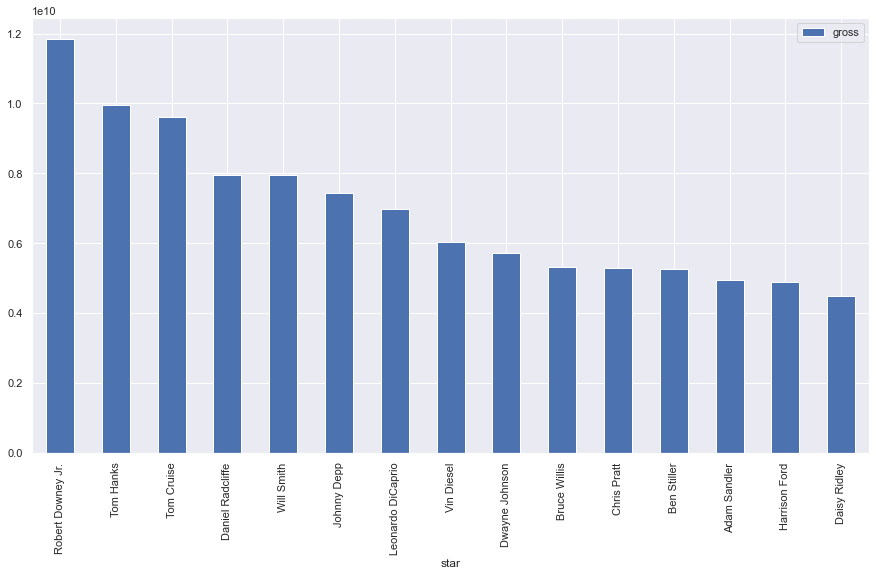

In [198]:
df_star.sort_values("gross",ascending = False).plot(kind = "bar",y = "gross")

In [192]:
df_year = df.groupby("year").sum()
df_year

score       votes        budget         gross  runtime
year                                                         
1980   580.0   4101541.0  5.688500e+08  2.483667e+09   9881.0
1981   712.2   3358556.0  7.094500e+08  2.520065e+09  11973.0
1982   792.8   4181471.0  8.366700e+08  3.187581e+09  13347.0
1983   867.3   4071375.0  8.939756e+08  2.750005e+09  14727.0
1984  1039.4   5966187.0  1.116326e+09  3.533092e+09  17547.0
1985  1261.9   5571207.0  1.220510e+09  3.691509e+09  20447.0
1986  1230.5   5678771.0  1.264787e+09  3.647512e+09  20361.0
1987  1243.4   6419279.0  1.382543e+09  4.033434e+09  20542.0
1988  1256.0   6763845.0  1.730540e+09  4.840386e+09  20717.0
1989  1235.1   6801886.0  1.784763e+09  6.087251e+09  20542.0
1990  1266.2   8334462.0  2.072503e+09  6.804236e+09  20985.0
1991  1277.9   7469956.0  2.268248e+09  6.254771e+09  21263.0
1992  1282.5   8000378.0  2.648378e+09  7.334168e+09  21338.0
1993  1276.4  10088764.0  2.685350e+09  8.053959e+09  21505.0
1994  1262.6  15543800.0  3.250455e+09  9.062926e+09  21114.0
1995  1291.6  14587959.0  3.544834e+09  9.448305e+09  21345.0
1996  1248.0  10432833.0  4.144580e+09  9.819528e+09  21448.0
1997  1271.1  15586700.0  5.256145e+09  1.311228e+10  21452.0
1998  1291.7  15911840.0  5.462266e+09  1.117602e+10  21473.0
1999  1299.9  20273900.0  6.742940e+09  1.350964e+10  21878.0
2000  1271.6  17972900.0  6.340250e+09  1.345413e+10  21570.0
2001  1290.6  21503700.0  6.446300e+09  1.561763e+10  21614.0
2002  1271.8  21112600.0  6.335629e+09  1.700344e+10  21185.0
2003  1266.5  21998700.0  6.598430e+09  1.766193e+10  21785.0
2004  1303.0  25840522.0  6.997327e+09  1.872175e+10  21860.0
2005  1272.6  22780700.0  7.189494e+09  1.786661e+10  21656.0
2006  1292.6  25211800.0  7.156700e+09  1.865407e+10  21732.0
2007  1294.8  26163800.0  7.065510e+09  2.038367e+10  21573.0
2008  1277.7  28425800.0  7.486730e+09  2.170216e+10  21333.0
2009  1288.9  26719100.0  7.522500e+09  2.333868e+10  21423.0
2010  1291.6  28741700.0  7.652750e+09  2.310660e+10  21309.0
2011  1296.5  30307000.0  7.868730e+09  2.483769e+10  21470.0
2012  1294.6  30374900.0  7.777295e+09  2.547619e+10  21427.0
2013  1323.8  33093300.0  8.101670e+09  2.599585e+10  22122.0
2014  1318.0  31993300.0  7.454300e+09  2.649148e+10  22032.0
2015  1303.7  23879185.0  7.329126e+09  2.674601e+10  22107.0
2016  1324.6  24699800.0  8.786500e+09  2.893884e+10  22230.0
2017  1312.3  21123800.0  7.409700e+09  2.848525e+10  22304.0
2018  1297.2  17472200.0  7.012980e+09  2.808529e+10  22300.0
2019  1272.2  15345824.0  6.658550e+09  3.033965e+10  22511.0
2020   131.4   1446348.0  8.629658e+08  2.848299e+09   2625.0

<AxesSubplot:xlabel='year'>

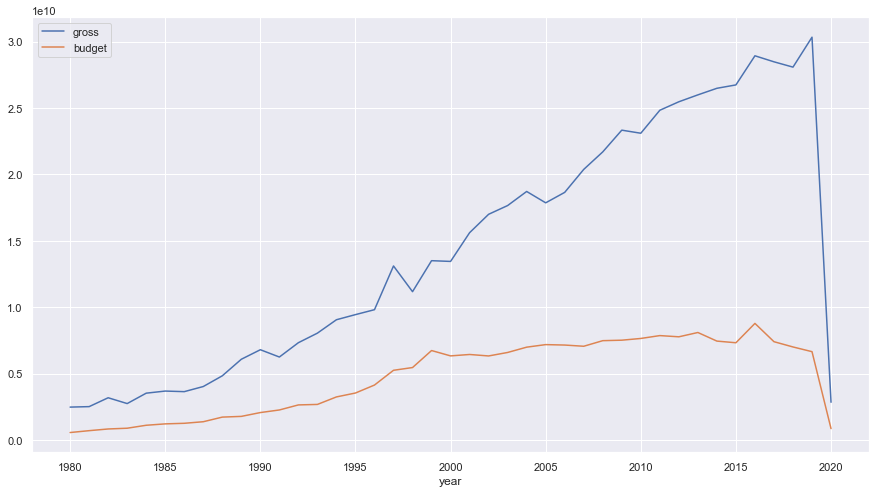

In [194]:
df_year.plot(kind = "line",y = ["gross","budget"])